In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
data=pd.read_csv('glass.data.txt', sep =',', header= None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
0     214 non-null int64
1     214 non-null float64
2     214 non-null float64
3     214 non-null float64
4     214 non-null float64
5     214 non-null float64
6     214 non-null float64
7     214 non-null float64
8     214 non-null float64
9     214 non-null float64
10    214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
data.groupby(10).count()[0]

10
1    70
2    76
3    17
5    13
6     9
7    29
Name: 0, dtype: int64

In [8]:
inputs=data.iloc[:, 1:-1]
inputs.head()

,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [10]:
outputs=data.iloc[:,-1]
outputs.head()

0    1
1    1
2    1
3    1
4    1
Name: 10, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2)

In [13]:
list_k=[]
list_acc=[]
for K_value in range(1, int(y_train.shape[0]**0.5)):
    list_k.append(K_value)
    neigh=KNeighborsClassifier(n_neighbors = K_value)
    neigh.fit(X_train, y_train)
    y_pred=neigh.predict(X_test)
    acc=accuracy_score(y_test, y_pred)*100
    list_acc.append(acc)
    print('Accuracy: ', acc, '% for K_value: ',K_value)

vi_tri = list_acc.index(max(list_acc))
k = list_k[vi_tri]

print('\nOptimal number of neighbors is %d with %0.1f%%' %(k, list_acc[vi_tri]))

Accuracy:  69.76744186046511 % for K_value:  1
Accuracy:  69.76744186046511 % for K_value:  2
Accuracy:  72.09302325581395 % for K_value:  3
Accuracy:  69.76744186046511 % for K_value:  4
Accuracy:  69.76744186046511 % for K_value:  5
Accuracy:  72.09302325581395 % for K_value:  6
Accuracy:  65.11627906976744 % for K_value:  7
Accuracy:  65.11627906976744 % for K_value:  8
Accuracy:  62.7906976744186 % for K_value:  9
Accuracy:  67.44186046511628 % for K_value:  10
Accuracy:  65.11627906976744 % for K_value:  11
Accuracy:  67.44186046511628 % for K_value:  12

Optimal number of neighbors is 3 with 72.1%


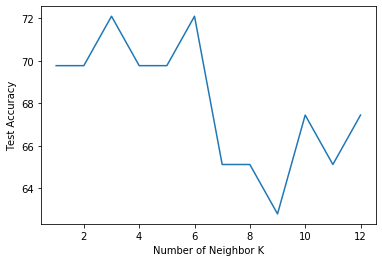

In [14]:
plt.plot(list_k, list_acc)
plt.xlabel('Number of Neighbor K')
plt.ylabel('Test Accuracy')
plt.show()

In [15]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
y_pred = knn.predict(X_test)

In [17]:
print('Prediction accuracy:', knn.score(X_test, y_test)*100)

Prediction accuracy: 72.09302325581395


In [18]:
df=pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values,
               'Prediction': pd.DataFrame(y_pred)[0].values})
df.head()

,Actual,Prediction
0,2,2
1,1,2
2,1,1
3,1,1
4,1,1


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
confusion_matrix(y_test, y_pred)

array([[14,  3,  1,  0,  0,  0],
       [ 3,  9,  0,  1,  1,  0],
       [ 2,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  4]], dtype=int64)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.78      0.76        18
           2       0.69      0.64      0.67        14
           3       0.50      0.33      0.40         3
           5       0.75      0.75      0.75         4
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         4

    accuracy                           0.72        43
   macro avg       0.61      0.58      0.60        43
weighted avg       0.73      0.72      0.72        43



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [22]:
data_sub = data.iloc[:,1:]
data_sub.corr()

,1,2,3,4,5,6,7,8,9,10
1,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
2,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
3,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
4,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
5,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
6,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
7,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
8,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
9,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
10,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [23]:
corr_features = data_sub.corr().index

In [25]:
corr_features

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

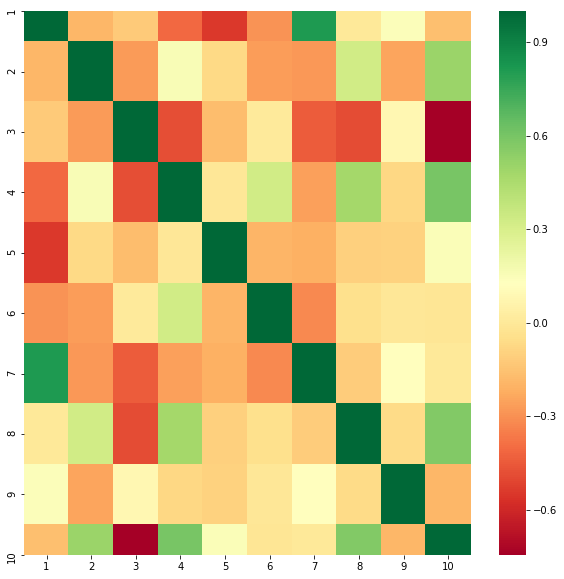

In [24]:
import seaborn as sns
plt.figure(figsize=(10,10))
#plot heat map
sns.heatmap(data[corr_features].corr(),cmap="RdYlGn")